In [19]:
import numpy as np
import matplotlib.pyplot as plt

def find_equilibrium(G, q, mode='all one', tol=1e-5, max_iter=1000):
    n = len(q)  # Number of agents
    x = np.zeros(n)  # Initial actions
    
    if mode == 'all one':
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum(G[i, :] * x)
                x_new[i] = max(0, q[i] - sum_gx)
            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all two':
        G2 = np.linalg.matrix_power(G, 2)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two unaware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            x_old = np.zeros(n)
            
            # Calculate x_old of unaware agents
            sum_g1x_old = np.sum(G[0, :] * x)
            x_old[0] = max(0, q[0] - sum_g1x_old)


            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            # Update x2 using G
            sum_g2x = G[1, 0] * x_old[0] + G[1, 2] * x[2]
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = G[2, 0] * x_old[0] + G[2, 1] * x[1]
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'one two aware':
        G2 = np.linalg.matrix_power(G, 2)  # Compute G squared
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            
            # Update x1 using G + G^2
            sum_g1x = np.sum((G[0, :] + G2[0, :]) * x)
            x_new[0] = max(0, q[0] - sum_g1x)

            # Update x2 using G
            sum_g2x = np.sum((G[1, :]) * x)
            x_new[1] = max(0, q[1] - sum_g2x)
            
            # Update x3 using G
            sum_g3x = np.sum((G[2, :]) * x)
            x_new[2] = max(0, q[2] - sum_g3x)

            
            # Check for convergence
            if np.linalg.norm(x_new - x) < tol:
                # print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new

    elif mode == 'all three':
        G2 = np.linalg.matrix_power(G, 2)
        G3 = np.linalg.matrix_power(G, 3)
        for iteration in range(max_iter):
            x_new = np.zeros(n)
            for i in range(n):
                sum_gx = np.sum((G[i, :] + G2[i, :] + G3[i, :]) * x)
                x_new[i] = max(0, q[i] - sum_gx)

            if np.linalg.norm(x_new - x) < tol:
                print(f"Converged in {iteration+1} iterations.")
                return x_new
            x = x_new


    print("Max iterations reached without convergence.")
    return x

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming the find_equilibrium function and G, q are defined elsewhere in your code
# equilibrium_all_one = find_equilibrium(G, q, mode='all one')
# equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
# equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
# equilibrium_all_two = find_equilibrium(G, q, mode='all two')

# # Create a list of equilibrium values and their corresponding labels
# equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
# modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
# agents = ['Agent 1', 'Agent 2', 'Agent 3']

# # Define the positions and width for the bars
# bar_width = 0.2
# x = np.arange(len(modes))

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))

# # Adding bars for each equilibrium mode
# colors = ['blue', 'orange', 'green', 'red']
# for i, (equilibrium, mode, color) in enumerate(zip(equilibrium_values, modes, colors)):
#     for j, value in enumerate(equilibrium):
#         plt.bar(x[i] + 1.2 * j * bar_width, value, bar_width, color=color, alpha=0.6, label=mode)
#         plt.text(x[i] + 1.2 * j * bar_width, 0.1, str(j+1), ha='center', va='bottom')

# # Adding title and labels
# plt.title('Equilibrium Actions for Different Modes by Agent')
# plt.xlabel('Modes')
# plt.ylabel('Equilibrium Actions')
# plt.xticks(x + bar_width, modes)

# # Display the plot
# plt.show()

In [21]:
# # Create a list of equilibrium values and their corresponding labels
# equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
# modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
# agents = ['Agent 1', 'Agent 2', 'Agent 3']

# # Define the positions and width for the bars
# bar_width = 0.1
# x = np.arange(len(agents))

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))

# # Adding bars for each mode
# for i, (equilibrium, mode) in enumerate(zip(equilibrium_values, modes)):
#     plt.bar(x + 1.2 * i * bar_width, equilibrium, bar_width, label=mode, alpha=0.8)

# # Adding title and labels
# plt.title('Equilibrium Actions for Different Modes by Agent')
# plt.ylabel('Equilibrium Actions')
# plt.xticks(x + bar_width * 1.5, agents)
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)

# # Display the plot
# plt.show()

Equilibrium actions for 'all one':
Converged in 33 iterations.
[0.7352958  0.4705906  0.61764928]

Equilibrium actions for 'one two unaware':
Converged in 14 iterations.
[0.52706691 0.47059191 0.6176424 ]

Equilibrium actions for 'one two aware':
[0.49999768 0.53333122 0.6333314 ]

Equilibrium actions for 'all two':
Max iterations reached without convergence.
[0.17128176 0.         0.        ]


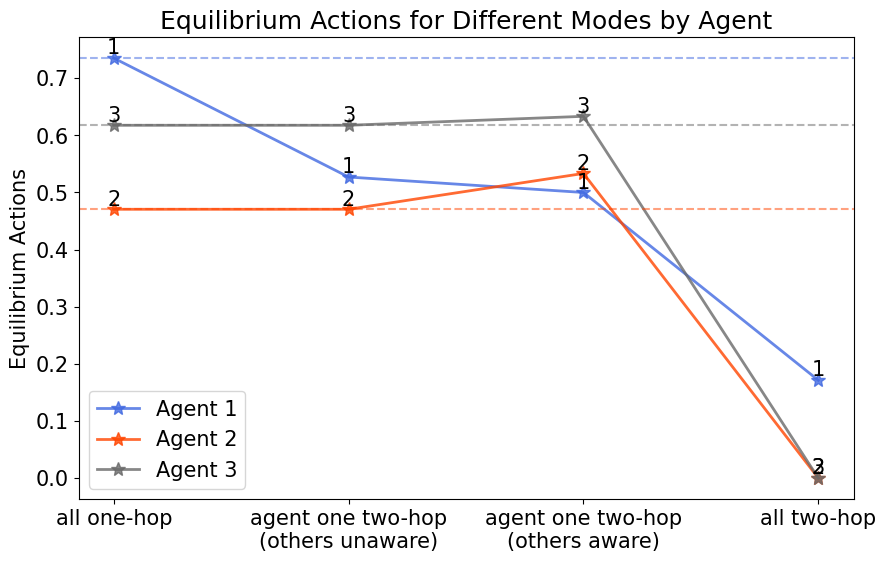

In [22]:
G = np.array([[0, 0.3, 0.2],
              [0.3, 0, 0.5],
              [0.2, 0.5, 0]])

q = np.ones(len(G))

# Testing all modes
print("Equilibrium actions for 'all one':")
equilibrium_all_one = find_equilibrium(G, q, mode='all one')
print(equilibrium_all_one)

print("\nEquilibrium actions for 'one two unaware':")
equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
print(equilibrium_one_two)

print("\nEquilibrium actions for 'one two aware':")
equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
print(equilibrium_one_two_aware)

print("\nEquilibrium actions for 'all two':")
equilibrium_all_two = find_equilibrium(G, q, mode='all two')
print(equilibrium_all_two)

# print("\nEquilibrium actions for 'all three':")
# equilibrium_all_three = find_equilibrium(G, q, mode='all three')
# print(equilibrium_all_three)

# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'agent one two-hop\n(others unaware)', 'agent one two-hop\n(others aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the x positions
x = np.arange(len(modes))

# Compute bar_g_i and underline_g_i for each row i while keeping the sign
bar_g_i = np.array([G[i][np.argmax(np.abs(G[i]))] for i in range(G.shape[0])])
underline_g_i = np.array([G[i][np.argmin(np.abs(G[i]))] for i in range(G.shape[0])])

# print(bar_g_i)
# print(underline_g_i)

# Compute the sums in the bounds
sum_gkj_xj = np.sum(G @ equilibrium_all_one)
# print(sum_gkj_xj)

# Initialize arrays to store the bounds for each agent in the first mode
lower_bound = np.zeros(len(agents))
upper_bound = np.zeros(len(agents))

# Calculate bounds for each agent in the first mode
for i in range(len(agents)):
    lower_bound[i] = equilibrium_all_one[i] - bar_g_i[i] * sum_gkj_xj
    upper_bound[i] = equilibrium_all_one[i] - underline_g_i[i] * sum_gkj_xj

# Plotting the line chart
plt.figure(figsize=(10, 6))

plt.rcParams.update({'font.size': 15})

# Colors for each agent
colors = ['royalblue', 'orangered', 'dimgray']

# Adding lines for each agent
for i, (agent, color) in enumerate(zip(agents, colors)):
    plt.plot(x, equilibrium_values[:, i], marker='*', label=f'{agent}', color=color, linewidth=2, alpha=0.8, markersize=10)
    for j, value in enumerate(equilibrium_values[:, i]):
        plt.text(x[j], value, str(i+1), ha='center', va='bottom')

# # Adding bounds as shaded areas for each agent in the first mode
# for i, color in enumerate(colors):
#     plt.fill_between([0.6+(0.1*i), 1], lower_bound[i], upper_bound[i], color=color, alpha=(0.2 + 0.1*i))

# plot "all two-hop" equilibrium values as dashed lines for comparison
for i, value in enumerate(equilibrium_all_one):
    plt.axhline(y=value, linestyle='--', color=colors[i], alpha=0.5)

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x, modes)
plt.legend()

plt.savefig('equilibrium_actions.png')
# Display the plot
plt.show()


Equilibrium actions for 'all one':
Converged in 4 iterations.
[1.   1.3  0.55]

Equilibrium actions for 'one two unaware':
Converged in 3 iterations.
[1.   1.3  0.55]

Equilibrium actions for 'one two aware':
[1.   1.3  0.55]

Equilibrium actions for 'all two':
Converged in 4 iterations.
[1.  1.3 0.7]


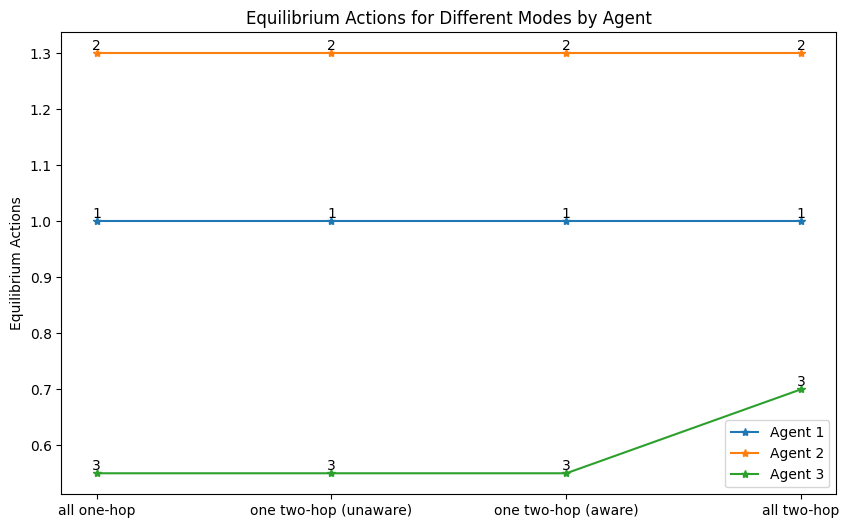

In [30]:
G = np.array([[0, 0, 0],
              [-0.3, 0, 0],
              [-0.2, 0.5, 0]])

q = np.ones(len(G)) 

# Testing all modes
print("Equilibrium actions for 'all one':")
equilibrium_all_one = find_equilibrium(G, q, mode='all one')
print(equilibrium_all_one)

print("\nEquilibrium actions for 'one two unaware':")
equilibrium_one_two = find_equilibrium(G, q, mode='one two unaware')
print(equilibrium_one_two)

print("\nEquilibrium actions for 'one two aware':")
equilibrium_one_two_aware = find_equilibrium(G, q, mode='one two aware')
print(equilibrium_one_two_aware)

print("\nEquilibrium actions for 'all two':")
equilibrium_all_two = find_equilibrium(G, q, mode='all two')
print(equilibrium_all_two)

# print("\nEquilibrium actions for 'all three':")
# equilibrium_all_three = find_equilibrium(G, q, mode='all three')
# print(equilibrium_all_three)

# Create a list of equilibrium values and their corresponding labels
equilibrium_values = np.array([equilibrium_all_one, equilibrium_one_two, equilibrium_one_two_aware, equilibrium_all_two])
modes = ['all one-hop', 'one two-hop (unaware)', 'one two-hop (aware)', 'all two-hop']
agents = ['Agent 1', 'Agent 2', 'Agent 3']

# Define the x positions
x = np.arange(len(modes))

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Adding lines for each agent
for i, agent in enumerate(agents):
    plt.plot(x, equilibrium_values[:, i], marker='*', label=f'Agent {i+1}')
    for j, value in enumerate(equilibrium_values[:, i]):
        plt.text(x[j], value, str(i+1), ha='center', va='bottom')

# Adding title and labels
plt.title('Equilibrium Actions for Different Modes by Agent')
plt.ylabel('Equilibrium Actions')
plt.xticks(x, modes)
plt.legend()

# Display the plot
plt.show()

# New example

In [16]:
import cvxpy as cp

# Define the budget B
B = 2  # Example budget value, you can change this

# Define the variables for the investments on each link
x_12 = cp.Variable(nonneg=True)
x_13 = cp.Variable(nonneg=True)
x_23 = cp.Variable(nonneg=True)
x_24 = cp.Variable(nonneg=True)
x_34 = cp.Variable(nonneg=True)
x_35 = cp.Variable(nonneg=True)
x_46 = cp.Variable(nonneg=True)
x_54 = cp.Variable(nonneg=True)
x_56 = cp.Variable(nonneg=True)

# Define the auxiliary variable for the minimum sum along any path
y = cp.Variable()

# Define the objective
objective = cp.Maximize(y)

# Define the constraints
constraints = [
    x_13 + x_35 + x_56 >= y,
    x_13 + x_34 + x_46 >= y,
    x_12 + x_24 + x_46 >= y,
    x_12 + x_23 + x_34 + x_46 >= y,
    x_12 + x_23 + x_35 + x_56 >= y,
    x_13 + x_35 + x_54 + x_46 >= y,
    x_12 + x_23 + x_35 + x_54 + x_46 >= y,
    x_12 + x_13 <= B,
    x_23 + x_24 <= B,
    x_34 + x_35 <= B,
    x_46 <= B,
    x_56 + x_54 <= B
]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem has been solved successfully
if problem.status == cp.OPTIMAL:
    print(f"Optimal investments: x_12={x_12.value}, x_13={x_13.value}, x_23={x_23.value}, x_24={x_24.value}, x_34={x_34.value}, x_35={x_35.value}, x_46={x_46.value}, x_56={x_56.value}, x_54={x_54.value}")
    print(f"Optimal y (minimum path exponent): {y.value}")
else:
    print("Optimization failed.")


Optimal investments: x_12=0.7500000007205514, x_13=1.2499999992151212, x_23=0.5000000032731636, x_24=1.499999995297435, x_34=0.9999999964751065, x_35=1.0000000030359892, x_46=2.000000000108517, x_56=1.9999999956376282, x_54=4.075881478542882e-09
Optimal y (minimum path exponent): 4.249999995385854


In [25]:
import cvxpy as cp

# Define the budget B
B = 2  # Example budget value, you can change this

# Define the variables for the investments on each link
x_12 = cp.Variable(nonneg=True)
x_13 = cp.Variable(nonneg=True)
x_23 = 0.5
x_24 = 1.5
x_34 = 1
x_35 = 1
x_46 = 2
x_54 = 0
x_56 = 2

# Define the auxiliary variable for the minimum sum along any path
y = cp.Variable()

# Define the objective
objective = cp.Maximize(y)

# Define the constraints
constraints = [
    x_13 + x_35 + x_56 >= y,
    x_13 + x_34 + x_46 >= y,
    x_12 + x_24 + x_46 >= y,
    x_12 + x_23 + x_34 >= y,
    x_12 + x_23 + x_35 >= y,
    x_13 + x_35 + x_54 >= y,
    x_12 + x_13 <= B,
    x_23 + x_24 <= B,
    x_34 + x_35 <= B,
    x_46 <= B,
    x_56 + x_54 <= B
]


# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Check if the problem has been solved successfully
if problem.status == cp.OPTIMAL:
    print(f"Optimal investments: x_12={x_12.value}, x_13={x_13.value}")
    print(f"Optimal y (minimum path exponent): {y.value}")
else:
    print("Optimization failed.")


Optimal investments: x_12=0.7500000000833899, x_13=1.249999999919988
Optimal y (minimum path exponent): 2.2499999998966924


Equilibrium actions: [0.35581639 0.3550614  0.31362748 0.34991352 0.33260983]


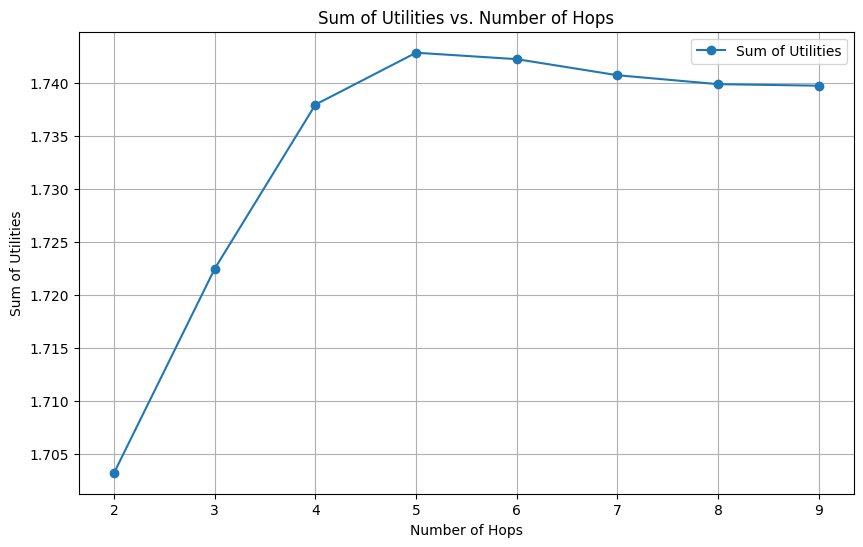

In [69]:
import numpy as np
import cvxpy as cp
from numpy import linalg as LA
import matplotlib.pyplot as plt

def b(x, alpha):
    """Benefit function b_i(x) = alpha_i * ln(1 + x)."""
    return alpha * cp.log(1 + x)

def u_i(x_i, x_neighbors, alpha, c):
    """Utility function u_i."""
    return b(x_i + x_neighbors, alpha) - c * x_i**2

def optimize_utility(G, alpha, c, tolerance=1e-4, max_iter=1000):
    """Optimize the utility for all agents until equilibrium is found."""
    n = G.shape[0]
    x = np.zeros(n)  # Initial actions of agents
    x_old = np.ones(n) * np.inf  # To ensure the loop starts

    iter_count = 0
    while LA.norm((x - x_old), 2) > tolerance and iter_count < max_iter:
        x_old = x.copy()
        for i in range(n):
            x_neighbors = np.sum(G[i] * x)
            
            # Define the optimization variable
            x_i = cp.Variable()

            # Define the objective function
            objective = cp.Maximize(u_i(x_i, x_neighbors, alpha[i], c[i]))

            # Define the constraints
            constraints =  [x_i >= 0,
                            x_i <= 1
                           ]  # Assuming the actions must be non-negative and budget is 1

            # Define the problem
            problem = cp.Problem(objective, constraints)

            # Solve the problem
            problem.solve()

            # Update the action for agent i
            x[i] = x_i.value

        iter_count += 1
    
    if iter_count == max_iter:
        print("Maximum iterations reached. Solution may not have converged.")
    # else:
        # print(f"Equilibrium found in {iter_count} iterations.")

    return x



n_agents = 5

G = [[0, 0.03, -0.2, 0.1, 0.2],
    [0.3, 0, -0.5, 0.2, 0.1],
    [0.02, 0.1, 0, 0.3, 0.4],
    [0.1, 0.2, -0.3, 0, 0.2],
    [-0.2, 0.1, 0.1, 0.5, 0]]

G = np.array(G)

# diagonal elements should be zero
np.fill_diagonal(G, 0)

alpha = np.ones(n_agents)
c = np.ones(n_agents)

equilibrium_actions = optimize_utility(G, alpha, c)
print("Equilibrium actions:", equilibrium_actions)

alpha = np.ones(n_agents)
c = np.ones(n_agents)
G_sum = G.copy()

equilibrium_actions_list = []
sum_utilities_list = []

for i in range(2, 10):
    G_i = np.linalg.matrix_power(G, i)
    G_sum += G_i

    equilibrium_actions = optimize_utility(G_sum, alpha, c)
    # print("Equilibrium actions for {}-hop:".format(i), equilibrium_actions)
    sum_utilities = np.sum(equilibrium_actions)
    # print("Sum of utilities:", sum_utilities)

    equilibrium_actions_list.append(equilibrium_actions)
    sum_utilities_list.append(sum_utilities)

# Plotting the utilities
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), sum_utilities_list, marker='o', label='Sum of Utilities')
plt.xlabel('Number of Hops')
plt.ylabel('Sum of Utilities')
plt.title('Sum of Utilities vs. Number of Hops')
plt.legend()
plt.grid(True)
plt.show()



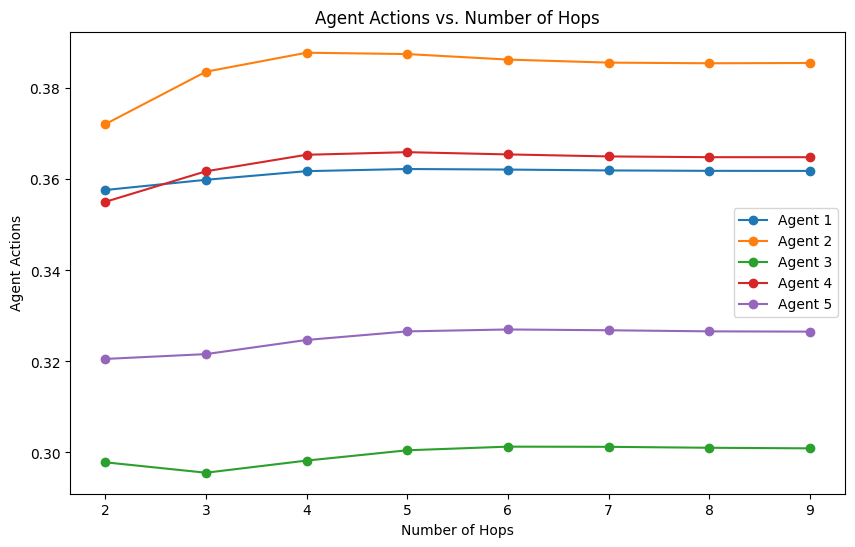

In [70]:
# illustrate agent actions
plt.figure(figsize=(10, 6))
for i in range(n_agents):
    plt.plot(range(2, 10), [actions[i] for actions in equilibrium_actions_list], marker='o', label=f'Agent {i+1}')
plt.xlabel('Number of Hops')
plt.ylabel('Agent Actions')
plt.title('Agent Actions vs. Number of Hops')
plt.legend()
